In [1]:
# Get an example signal
import scipy.datasets  # new in scipy 1.10.0, used to be in scipy.misc
ecg_signal = scipy.datasets.electrocardiogram()


C:\Users\MOISES\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
!pip install wfdb

  Obtaining dependency information for wfdb from https://files.pythonhosted.org/packages/ce/00/b83d0bd64384455dbc1f8eccb7b5d6dac23728515a9d4d74aa4def6c6fe4/wfdb-4.1.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.0 MB 660.6 kB/s eta 0:00:02
     - -------------------------------------- 0.0/1.0 MB 393.8 kB/s eta 0:00:03
     -- ------------------------------------- 0.1/1.0 MB 491.5 kB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.0 MB 585.1 kB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.0 MB 585.1 kB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.0 MB 585.1 kB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.0 MB 585.1 kB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.0 MB 585.1 kB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.0 MB 585.1 kB/s eta 0:00:02
     --- -------

In [4]:
# OPTION 1: very fast, good performance, large user-base
import neurokit2  # pip install neurokit2
_, results = neurokit2.ecg_peaks(ecg_signal, sampling_rate=360)
rpeaks = results["ECG_R_Peaks"]

# OPTION 2: blazingly fast, solid performance, relatively uncommon
import sleepecg  # pip install sleepecg
rpeaks = sleepecg.detect_heartbeats(ecg_signal, fs=360)

# OPTION 3: excellent performance, but slower, from MIT researchers
import wfdb.processing
rpeaks = wfdb.processing.xqrs_detect(ecg_signal, fs=360, verbose=False)


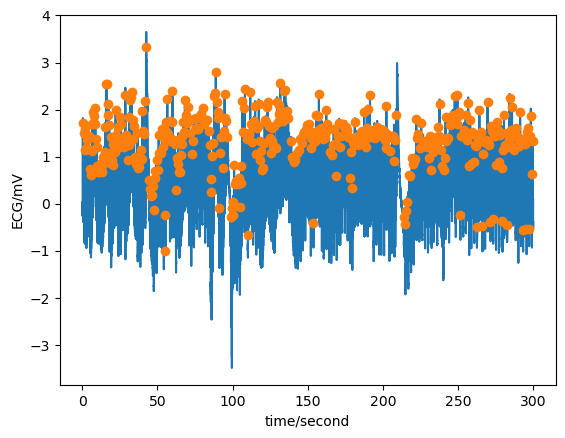

In [5]:
import wfdb  # pip install wfdb

# less fancy: plt.plot(ecg_signal); plt.plot(rpeaks, ecg_signal[rpeaks], "x")
fig = wfdb.plot_items(
    ecg_signal,
    [rpeaks],
    fs=360,
    sig_name=["ECG"],
    sig_units=["mV"],
    time_units="seconds",
    return_fig=True,
    ann_style="o",
)


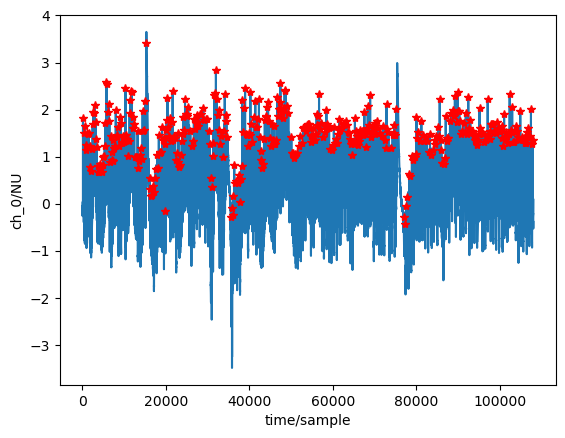

In [6]:
import wfdb.processing

rpeaks_corrected = wfdb.processing.correct_peaks(
    ecg_signal, rpeaks, search_radius=36, smooth_window_size=50, peak_dir="up"
)
wfdb.plot_items(ecg_signal, [rpeaks_corrected])  # styling options omitted
